In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


In [9]:
# Load dataset
df = pd.read_csv("side_channel_stress_dataset.csv")

# Check condition distribution
print(df["condition"].value_counts())
df.head()


condition
normal           1000
stressed_0.1s    1000
stressed_0.2s    1000
stressed_0.5s    1000
Name: count, dtype: int64


,char,avg_time,std_time,cpu_load,mem_load,condition,z_score_time
0,0,0.000190,0.000049,0.0,56.8,normal,-1.099190
1,0,0.000218,0.000084,12.5,56.8,normal,-0.954516
2,0,0.000232,0.000106,12.5,56.8,normal,-0.882591
3,0,0.000218,0.000093,66.7,56.8,normal,-0.954567
4,0,0.000218,0.000081,33.3,56.8,normal,-0.955858


In [10]:
# Optional: encode 'condition' if needed for later
le = LabelEncoder()
df["condition_encoded"] = le.fit_transform(df["condition"])

# Show mapping for reference
dict(zip(le.classes_, le.transform(le.classes_)))


{'normal': 0, 'stressed_0.1s': 1, 'stressed_0.2s': 2, 'stressed_0.5s': 3}

In [11]:
def train_model_for_condition(dataframe, condition_name):
    subset = dataframe[dataframe["condition"] == condition_name]
    
    if subset.empty:
        print(f"⚠️ No data found for: {condition_name}")
        return None, None
    
    X = subset[["avg_time", "std_time", "cpu_load", "mem_load"]]
    y = subset["char"]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42)
    
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"✅ Accuracy for '{condition_name}': {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    return clf, acc


In [12]:
conditions = ["normal", "stressed_0.1s", "stressed_0.2s", "stressed_0.5s"]
condition_accuracies = {}

for cond in conditions:
    model, acc = train_model_for_condition(df, cond)
    if acc is not None:
        condition_accuracies[cond] = acc


✅ Accuracy for 'normal': 0.6450
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.47      0.40      0.43        20
           2       0.43      0.45      0.44        20
           3       0.44      0.40      0.42        20
           4       0.50      0.35      0.41        20
           5       0.36      0.50      0.42        20
           6       0.70      0.70      0.70        20
           7       0.95      0.90      0.92        20
           8       1.00      0.95      0.97        20
           9       0.86      0.95      0.90        20

    accuracy                           0.65       200
   macro avg       0.65      0.65      0.64       200
weighted avg       0.65      0.65      0.64       200

✅ Accuracy for 'stressed_0.1s': 0.8200
              precision    recall  f1-score   support

           0       0.73      0.95      0.83        20
           1       0.89      0.85      0.87        20
       

C:\Users\dharm\AppData\Local\Temp\ipykernel_16580\3884082126.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\users\dharm\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


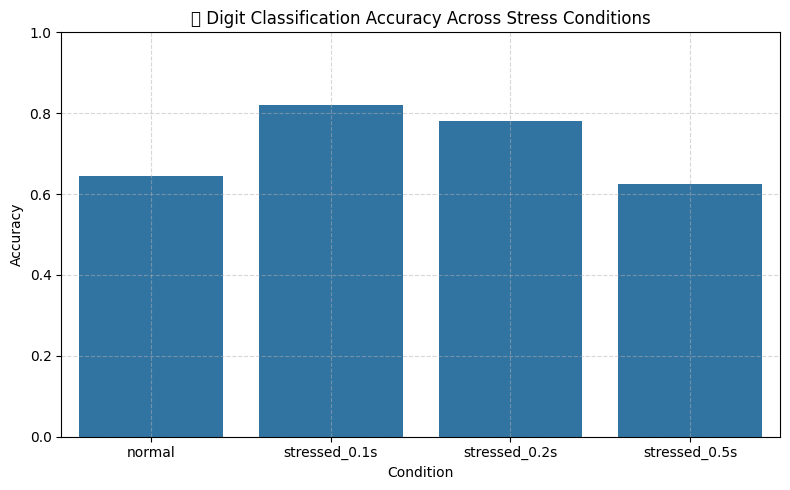

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(condition_accuracies.keys()), y=list(condition_accuracies.values()))
plt.title("📊 Digit Classification Accuracy Across Stress Conditions")
plt.xlabel("Condition")
plt.ylabel("Accuracy")
plt.ylim(0, 1.0)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\dharm\AppData\Local\Temp\ipykernel_16580\2972351743.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(condition_accuracies.keys()), y=list(condition_accuracies.values()), palette="Set2")
c:\users\dharm\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


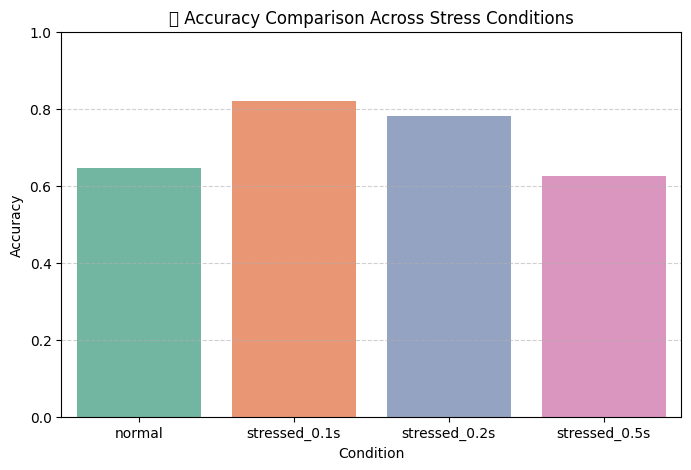

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(condition_accuracies.keys()), y=list(condition_accuracies.values()), palette="Set2")
plt.title("🧠 Accuracy Comparison Across Stress Conditions")
plt.ylabel("Accuracy")
plt.ylim(0, 1.0)
plt.xlabel("Condition")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


In [15]:
def plot_feature_importance(model, condition):
    features = ["avg_time", "std_time", "cpu_load", "mem_load"]
    importances = model.feature_importances_
    
    plt.figure(figsize=(6, 4))
    sns.barplot(x=features, y=importances, palette="coolwarm")
    plt.title(f"📊 Feature Importance - {condition}")
    plt.ylabel("Importance")
    plt.ylim(0, 1)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()


✅ Accuracy for 'normal': 0.6450
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.47      0.40      0.43        20
           2       0.43      0.45      0.44        20
           3       0.44      0.40      0.42        20
           4       0.50      0.35      0.41        20
           5       0.36      0.50      0.42        20
           6       0.70      0.70      0.70        20
           7       0.95      0.90      0.92        20
           8       1.00      0.95      0.97        20
           9       0.86      0.95      0.90        20

    accuracy                           0.65       200
   macro avg       0.65      0.65      0.64       200
weighted avg       0.65      0.65      0.64       200



C:\Users\dharm\AppData\Local\Temp\ipykernel_16580\4091456389.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=importances, palette="coolwarm")
c:\users\dharm\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


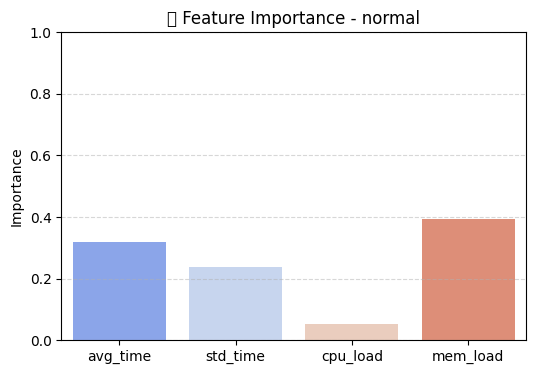

✅ Accuracy for 'stressed_0.1s': 0.8200
              precision    recall  f1-score   support

           0       0.73      0.95      0.83        20
           1       0.89      0.85      0.87        20
           2       1.00      1.00      1.00        20
           3       0.86      0.90      0.88        20
           4       0.61      0.55      0.58        20
           5       0.95      1.00      0.98        20
           6       0.72      0.65      0.68        20
           7       0.83      0.95      0.88        20
           8       0.57      0.40      0.47        20
           9       0.95      0.95      0.95        20

    accuracy                           0.82       200
   macro avg       0.81      0.82      0.81       200
weighted avg       0.81      0.82      0.81       200



C:\Users\dharm\AppData\Local\Temp\ipykernel_16580\4091456389.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=importances, palette="coolwarm")
c:\users\dharm\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


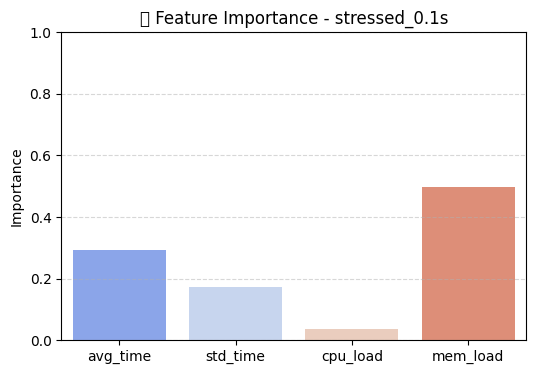

✅ Accuracy for 'stressed_0.2s': 0.7800
              precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.73      0.80      0.76        20
           2       0.95      1.00      0.98        20
           3       0.68      0.65      0.67        20
           4       0.83      0.75      0.79        20
           5       0.61      0.70      0.65        20
           6       0.90      0.90      0.90        20
           7       0.84      0.80      0.82        20
           8       0.74      0.85      0.79        20
           9       0.65      0.65      0.65        20

    accuracy                           0.78       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.78      0.78       200



C:\Users\dharm\AppData\Local\Temp\ipykernel_16580\4091456389.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=importances, palette="coolwarm")
c:\users\dharm\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


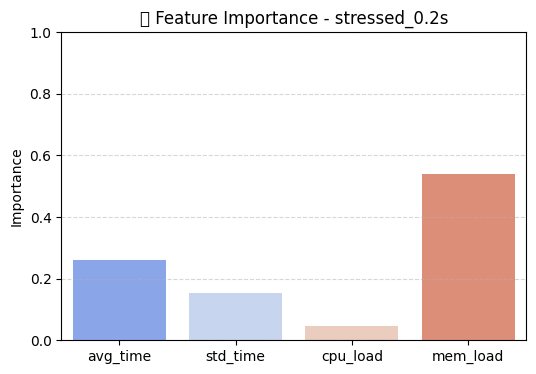

✅ Accuracy for 'stressed_0.5s': 0.6250
              precision    recall  f1-score   support

           0       0.58      0.75      0.65        20
           1       0.56      0.75      0.64        20
           2       0.64      0.45      0.53        20
           3       0.62      0.50      0.56        20
           4       0.55      0.55      0.55        20
           5       0.52      0.60      0.56        20
           6       0.83      0.75      0.79        20
           7       0.40      0.30      0.34        20
           8       0.78      0.70      0.74        20
           9       0.78      0.90      0.84        20

    accuracy                           0.62       200
   macro avg       0.63      0.63      0.62       200
weighted avg       0.63      0.62      0.62       200



C:\Users\dharm\AppData\Local\Temp\ipykernel_16580\4091456389.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=importances, palette="coolwarm")
c:\users\dharm\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


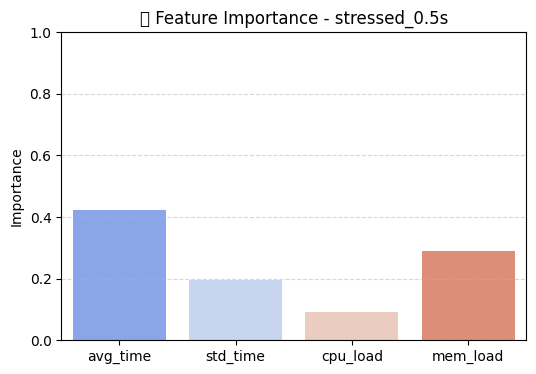

In [16]:
for cond in conditions:
    model, _ = train_model_for_condition(df, cond)
    if model:
        plot_feature_importance(model, cond)


In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, condition):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {condition}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


✅ Accuracy: 0.6450 - normal


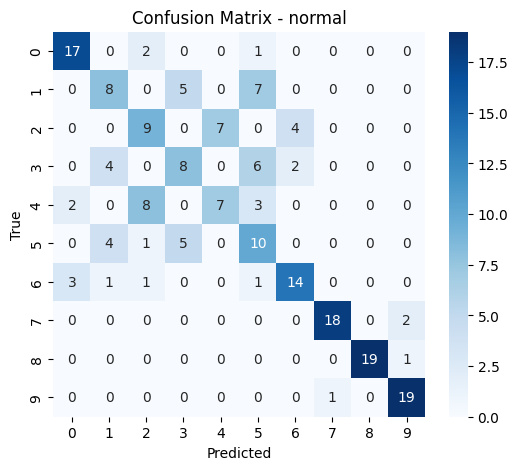

✅ Accuracy: 0.8200 - stressed_0.1s


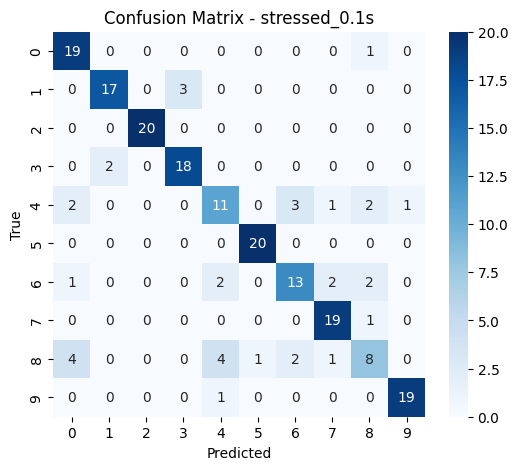

✅ Accuracy: 0.7800 - stressed_0.2s


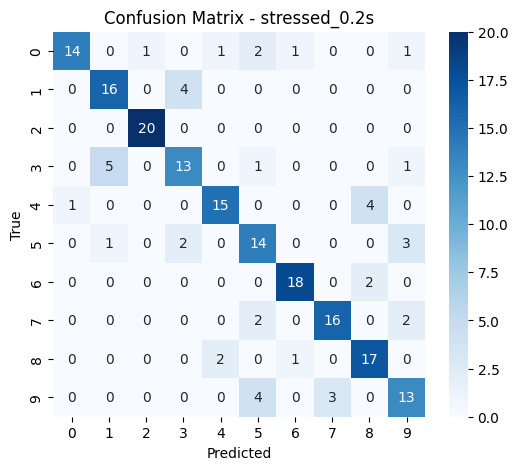

✅ Accuracy: 0.6250 - stressed_0.5s


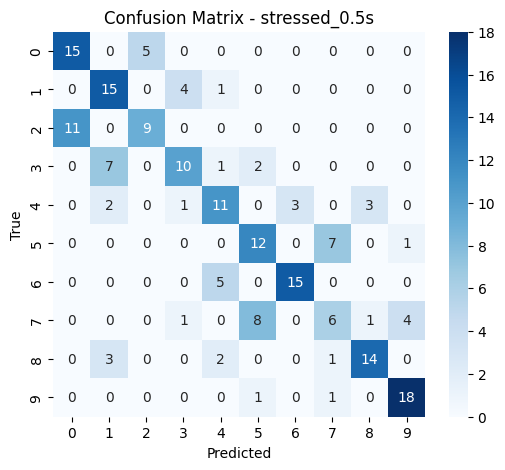

In [18]:
def train_with_cm(dataframe, condition_name):
    subset = dataframe[dataframe["condition"] == condition_name]
    X = subset[["avg_time", "std_time", "cpu_load", "mem_load"]]
    y = subset["char"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"✅ Accuracy: {acc:.4f} - {condition_name}")
    plot_confusion_matrix(y_test, y_pred, condition_name)

    return clf, acc

# Call it for each
for cond in conditions:
    train_with_cm(df, cond)


c:\users\dharm\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


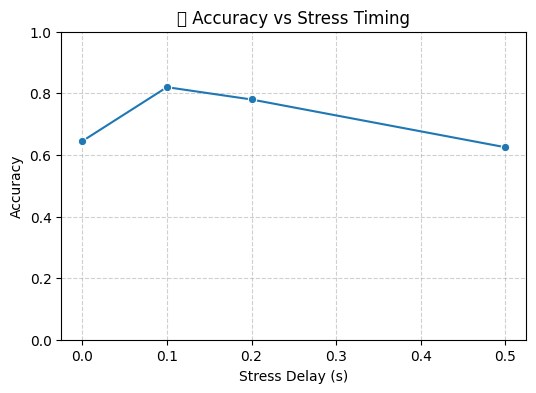

In [19]:
stress_levels = {
    "normal": 0,
    "stressed_0.1s": 0.1,
    "stressed_0.2s": 0.2,
    "stressed_0.5s": 0.5,
}

# Convert to DataFrame for line plot
acc_df = pd.DataFrame({
    "Stress Delay (s)": [stress_levels[c] for c in condition_accuracies.keys()],
    "Accuracy": list(condition_accuracies.values())
}).sort_values("Stress Delay (s)")

plt.figure(figsize=(6, 4))
sns.lineplot(data=acc_df, x="Stress Delay (s)", y="Accuracy", marker="o")
plt.title("📈 Accuracy vs Stress Timing")
plt.grid(True, linestyle="--", alpha=0.6)
plt.ylim(0, 1.0)
plt.show()
